# CS Discussion: Intro to Machine Learning

In [23]:
# Common python imports
import math
import random
import warnings
import os

# Common machine learning imports (basically, just always import these packages)
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn specific packages
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Local imports
from models.NNClassifier import NNClassifier
from decorators.SingleSampleDecorator import SingleSampleDecorator
from helpers import show_digit, load_image

warnings.simplefilter("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

## Section I: Load & Clean Data

After importing your dependencies, one of the first things you should do is to set a random seed. This ensure repeatability and simplifies debugging.

When it comes time to test your model, this seed should be changed and/or ran a few times without being set.

In [18]:
SEED = 0
random.seed(SEED)
np.random.seed(SEED)

The next step is to load and split your test data. According to a random website that I found on Google (seems legit enough), these are some common train-test split ratios:

![image](nb-res/img1.png)

You may occasionally hear about a third data subset, called a "validation set." This used to be more common before modern cross validation techniques became commonplace in libraries. Read more here: https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f.

To keep things simple, we will stick with a utility method (part of sklearn.model_selection's package) to help us divide our data. We will go with a 80-20 train-test split.

We will be using a subset of the MNIST (Modified National Institute of Standards and Technology database) dataset, which consists of 70k handwritten digits by American high school students [Source: http://yann.lecun.com/exdb/mnist/]. This dataset was developed in 1998 and is very commonly used when teaching machine learning concepts. A subset, which includes 1,797 of these digits, is a part of the scikit-learn library by default and can be easily loaded.

**Fun fact:** When this dataset was first developed, error rates of 12% were common. Around 20 years later in 2018, the University of Virginia was able to achieve an error rate of 0.18% using a combination of three neural networks (fully connected, recurrent and convolution neural networks), nearly a 70x improvement [Source: https://en.wikipedia.org/wiki/MNIST_database].

In [19]:
# Import the digits dataset
digits = load_digits()

# Split the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

# Show dimensions
print('== Train Dimensions ==')
print(f'X: {X_train.shape}')
print(f'y: {y_train.shape}')

print('== Test Dimensions ==')
print(f'X: {X_test.shape}')
print(f'y: {y_test.shape}')

== Train Dimensions ==
X: (1437, 64)
y: (1437,)
== Test Dimensions ==
X: (360, 64)
y: (360,)


We will use `X` to represent our input data (independent variables) and `y` to represent what we are trying to predict (dependent variables).

Somewhat less common nomenclature to denote the dimensions is to use `m` for the number of features (in this case: 64) and to use `n` for the number of samples.

Can anyone guess why we have 64 features?

While the sk-learn `LogisticRegression` model that we will be using is smart enough to handle unnormalized data, it is generally good practice to ensure our input features are bounded to the range [0, 1].

![image](nb-res/img2.png)

Source: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [20]:
# Normalize data
max = np.amax(X_train)
X_train /= max
X_test /= max

Now that our data has been "cleaned," we can take a look at an example image from our dataset.

[0.     0.125  0.6875 0.8125 0.6875 0.125  0.     0.     0.     0.4375
 0.75   0.25   0.8125 0.5    0.     0.     0.     0.375  0.8125 0.3125
 0.875  0.8125 0.     0.     0.     0.     0.1875 0.6875 0.5625 0.6875
 0.3125 0.     0.     0.     0.     0.     0.     0.5    0.5    0.
 0.     0.     0.     0.     0.     0.1875 0.6875 0.     0.     0.
 0.125  0.     0.0625 0.5625 0.625  0.     0.     0.0625 0.9375 1.
 1.     0.875  0.125  0.    ]
(64,)
9


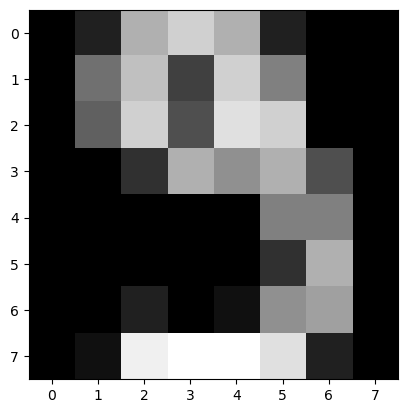

In [21]:
INDEX = 65

show_digit(X_test[INDEX])
print(X_test[INDEX])
print(X_test[INDEX].shape)
print(y_test[INDEX])

## Section II: Train & Evaluate Logistic Regression Model

![image](nb-res/img3.png)

Source: https://www.researchgate.net/figure/Logistic-regression-and-linear-regression_fig1_335786324

![image](nb-res/img4.png)

Source: https://www.statology.org/logistic-regression-vs-linear-regression/

![image](nb-res/img7.png)

Source: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

![image](nb-res/img5.png)

Source: https://utkuufuk.com/2018/06/03/one-vs-all-classification/

![image](nb-res/img6.png)

Source: https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

In [22]:
model = SingleSampleDecorator(LogisticRegression()).fit(X_train, y_train)
type(model)

decorators.SingleSampleDecorator.SingleSampleDecorator

In [8]:
model.predict_proba(X_test[INDEX])

array([[2.93689844e-03, 5.74857506e-04, 8.79552482e-03, 5.98811558e-02,
        8.33119163e-05, 6.75031657e-03, 1.95524774e-05, 5.59997679e-04,
        1.67910219e-03, 9.18719283e-01]])

In [9]:
model.predict(X_test[INDEX])

array([9])

In [7]:
model.score(X_test, y_test)

0.9638888888888889

# Section III: Load Your Own Data

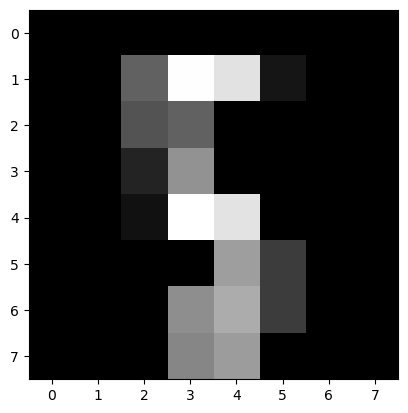

In [10]:
img = load_image('data/sketch (1).jpg')
show_digit(img)

In [11]:
model.predict(img)

array([4])

# Section IV: Use a "More Powerful" Model

In [12]:
model2 = NNClassifier().fit(X_train, y_train)

In [14]:
model2.predict(img)

array([8])

In [13]:
model2.score(X_test, y_test)

0.9666666666666667